# Libraries

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy.signal import convolve2d

# Load Image

In [4]:
img = cv2.imread('hidden_object_2.jpg', cv2.IMREAD_GRAYSCALE)
img

# Useful Functions

In [5]:
def show_images(image, image_new):
    plt.subplot(121)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')
    plt.subplot(122)
    plt.imshow(image_new, cmap='gray')
    plt.title('Enhanced Image')
    plt.axis('off')
    plt.show()

def get_pdf(image):
    hist, _ = np.histogram(image.flatten(), 256, [0, 255])
    return hist / image.size

def get_stats(pdf):
    indices = np.arange(len(pdf))
    mean = np.sum(indices * pdf)
    variance = np.sum(((indices - mean) ** 2) * pdf)
    std_dev = np.sqrt(variance)
    return mean, std_dev

def histStatistic(image, kernel_size=(7, 7), C=22.8, k_params=[0, 0.1, 0, 0.1]):
    global_pdf = get_pdf(image)
    global_mean, global_std_dev = get_stats(global_pdf)

    kernel = np.ones(kernel_size) / (kernel_size[0] * kernel_size[1])

    local_means = convolve2d(image, kernel, mode='same', boundary='wrap')
    local_squared_means = convolve2d(image ** 2, kernel, mode='same', boundary='wrap')
    local_std_devs = np.sqrt(local_squared_means - local_means ** 2)

    mask = (k_params[0] * global_mean <= local_means) & (local_means <= k_params[1] * global_mean) & \
           (k_params[2] * global_std_dev <= local_std_devs) & (local_std_devs <= k_params[3] * global_std_dev)

    image_new = np.copy(image)
    image_new[mask] = C * image[mask]

    return image_new

def localEnhancement(image):
    _, black_mask = cv2.threshold(image, 1, 255, cv2.THRESH_BINARY_INV)
    contours, _ = cv2.findContours(black_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    output_image = image.copy()

    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        black_region = image[y:y+h, x:x+w]
        equalized_region = cv2.equalizeHist(black_region)
        output_image[y:y+h, x:x+w] = equalized_region

    return output_image

# Histogram Statistics method

In [6]:
statistic_img = histStatistic(image=img)
show_images(img, statistic_img)

AttributeError: 'NoneType' object has no attribute 'flatten'

# Local Enhancement method

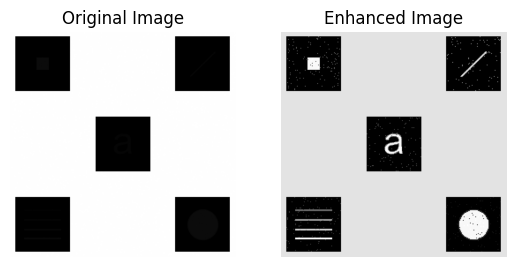

array([[227, 227, 227, ..., 227, 227, 227],
       [227, 227, 227, ..., 227, 227, 227],
       [227, 227, 227, ..., 227, 227, 227],
       ...,
       [227, 227, 227, ..., 227, 227, 227],
       [227, 227, 227, ..., 227, 227, 227],
       [227, 227, 227, ..., 227, 227, 227]], dtype=uint8)
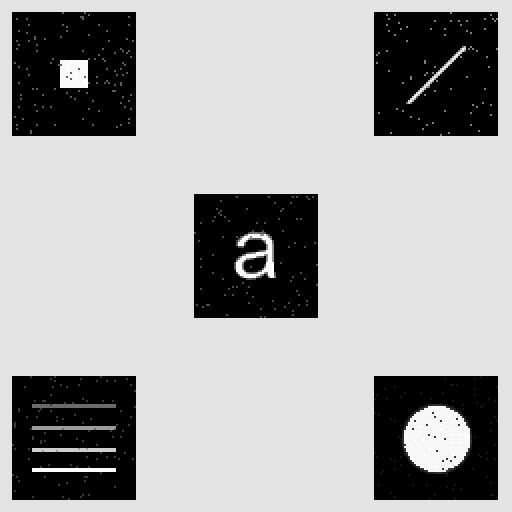

In [ ]:
local_enhanced_img = localEnhancement(img)
show_images(img, local_enhanced_img)

# Appendix

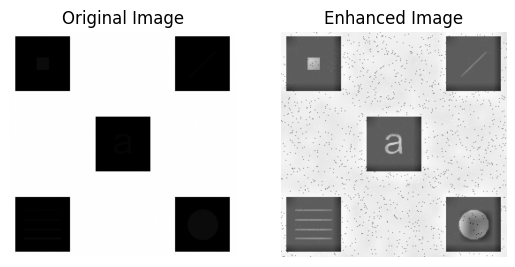

array([[246, 246, 246, ..., 227, 227, 227],
       [246, 246, 246, ..., 227, 227, 227],
       [246, 246, 246, ..., 227, 227, 227],
       ...,
       [243, 243, 243, ..., 238, 238, 238],
       [243, 243, 243, ..., 238, 238, 238],
       [243, 243, 243, ..., 238, 238, 238]], dtype=uint8)
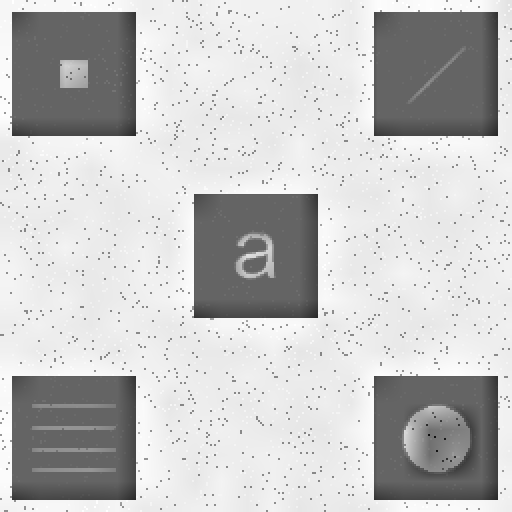

In [ ]:
# Test about CLAHE
clahe = cv2.createCLAHE(clipLimit=160, tileGridSize=(15,15))
clahe_img = clahe.apply(img)
show_images(img, clahe_img)

In [ ]:
def show_plot(image, title):
    plt.figure(figsize=(10, 3))
    plt.subplot(121)
    plt.axis('off')
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.subplot(122)
    plt.hist(image.ravel(), bins=256, range=(0, 256))
    plt.title('Histogram')
    plt.show()

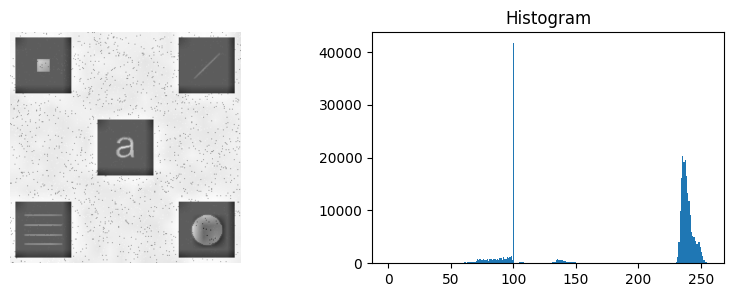

In [ ]:
show_plot(clahe_img, "")

In [ ]:
4